# ITM

Curso: Visión artificial

Docente: Mateo Rico García



# Clase 12: Operaciones morfológicas

https://omes-va.com/deteccion-de-colores/

Agenda:
- 1. Segmentación (Repaso)
- 2. Operaciones morfológicas
- 3. Actividad


# 1. Segmentación (Repaso)

Es el proceso por el cual se busca un umbral óptimo que permita, dentro de una imagen, distinguir los objetos con respecto al fondo. Para este proceso, las imágenes deben ser analizadas detalladamente desde los diferentes espacios de color.

In [ ]:
#Conectando con el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargando librerías
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios


Mostrando imagen de entrada


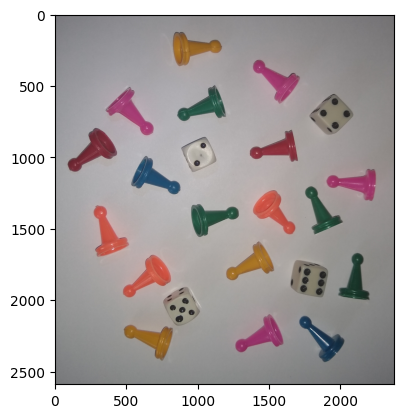

In [ ]:
#Leyendo imagen de entrada
Ruta = r'/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/12/Caso_1.bmp' #Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee
print('Mostrando imagen de entrada')
plt.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255) #Muestra
plt.show()
print('')

Mostrando gráficos en RGB & HSV


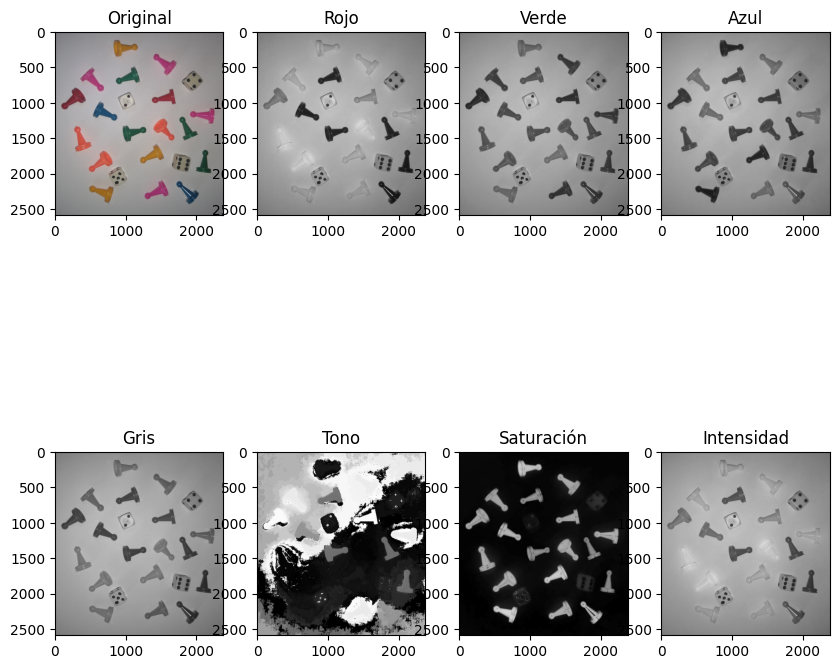

In [ ]:
#Extracción de canales en HSV
Imagen_hsv = cv2.cvtColor(Imagen,cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]
#Extracción de canales en RGB
#Imagen=Imagen[:,:,[2,1,0]]#Organiza
Rojo=Imagen[:,:,2]
Verde=Imagen[:,:,1]
Azul=Imagen[:,:,0]
Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
#Mostrando en pantalla
print('Mostrando gráficos en RGB & HSV')
fig, axs =plt.subplots(2, 4,figsize=(10,10))
axs[0, 0].imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(Rojo.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 1].set_title('Rojo')
axs[0, 2].imshow(Verde.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 2].set_title('Verde')
axs[0, 3].imshow(Azul.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[0, 3].set_title('Azul')
axs[1, 0].imshow(Gris.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 0].set_title('Gris')
axs[1, 1].imshow(Hue.astype('uint8'),vmin=0, vmax=179,cmap='gray')
axs[1, 1].set_title('Tono')
axs[1, 2].imshow(Saturation.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 2].set_title('Saturación')
axs[1, 3].imshow(Value.astype('uint8'),vmin=0, vmax=255,cmap='gray')
axs[1, 3].set_title('Intensidad')
plt.show()
print('')

Aplicación: Segmentando fichas por color.

Imprimiendo resultado de segmentación


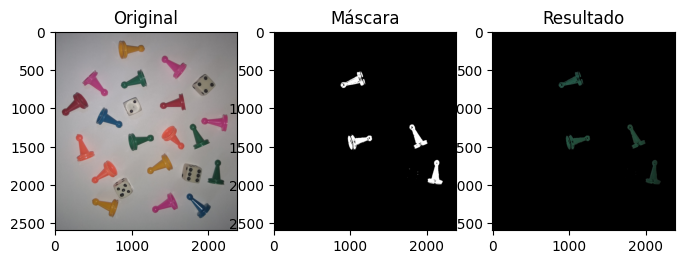

In [ ]:
#Segmentando fichas verde
[Fl, Cl, Ch]=Imagen.shape
Bin_Fichas_Verdes =np.zeros((Fl,Cl))
Bin_Fichas_Verdes = (Hue > 70)*(Hue < 85)*(Rojo < 50)
#Organizando resultado
Resultado_Fichas_V = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_V[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Verdes
Resultado_Fichas_V[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Verdes
Resultado_Fichas_V[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Verdes
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Verdes.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_V[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

Imprimiendo resultado de segmentación


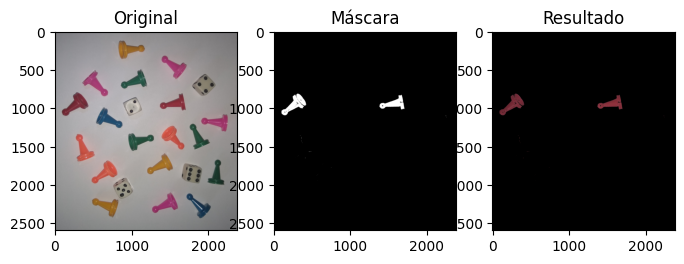

In [ ]:
#Buscando fichas rojas
Bin_Fichas_Rojas =np.zeros((Fl,Cl))
Bin_Fichas_Rojas = (Hue > 170)*(Hue < 180)*(Saturation > 130)
#Organizando resultado
Resultado_Fichas_R = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_R[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Rojas
Resultado_Fichas_R[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Rojas
Resultado_Fichas_R[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Rojas
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Rojas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_R[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')


#2. Operaciones morfológicas

Dilatación:

Al aplicar esta operación sobre una imagen obtendremos el efecto de expandir o ampliar la región de la imagen que estemos trabajando.

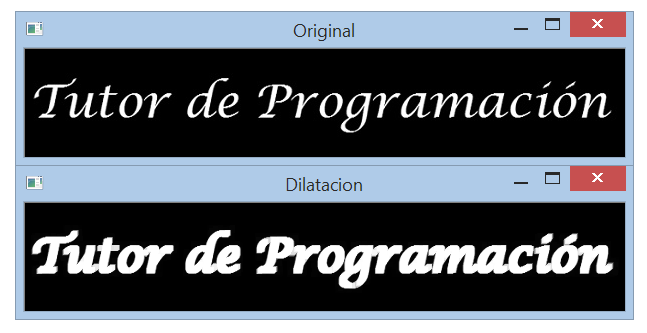

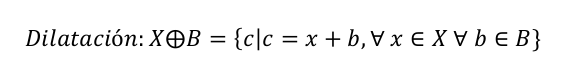

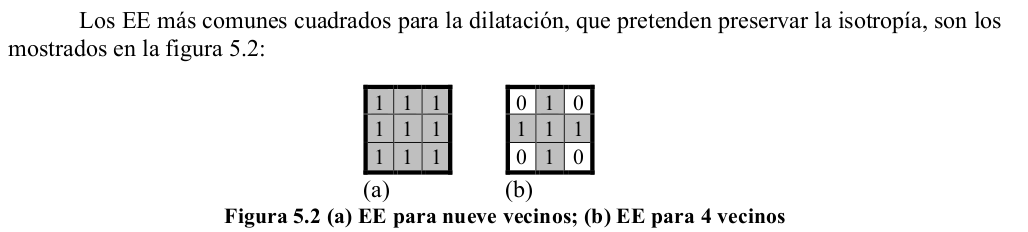

Imprimiendo resultado de segmentación


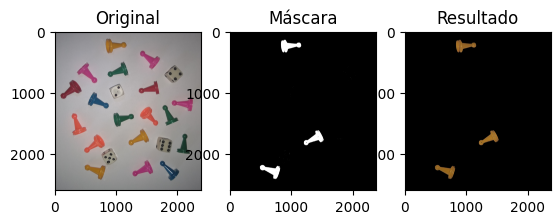

In [ ]:
#Buscando fichas amarilla
Bin_Fichas_Amarillas =np.zeros((Fl,Cl))
Bin_Fichas_Amarillas = (Hue < 20)*(Hue > 10)*(Saturation > 130)
#Organizando resultado
[Fl, Cl, Ch]=Imagen.shape
Resultado_Fichas_Am = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_Am[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Amarillas
Resultado_Fichas_Am[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Amarillas
Resultado_Fichas_Am[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Amarillas
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3)
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_Am[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

In [ ]:
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [ ]:
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7)))

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


In [ ]:
print(cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)))

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


Las regiones se pueden ampliar con dilatación.

Imprimiendo resultado de dilatación


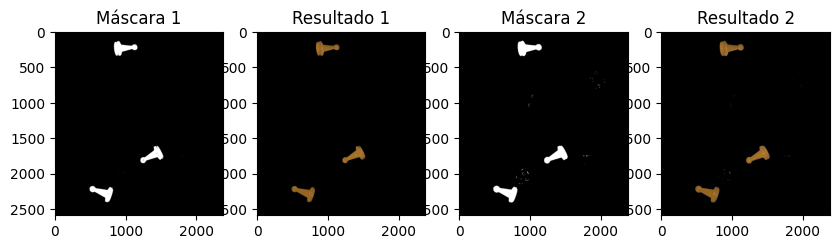

In [ ]:
#Se crea kernel de procesamiento
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
dilated = cv2.dilate(Bin_Fichas_Amarillas.astype('uint8'),kernel)
#Armando resultado
Resultado_Fichas_Am2 = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_Am2[:,:,0]=Imagen[:,:,0]*dilated
Resultado_Fichas_Am2[:,:,1]=Imagen[:,:,1]*dilated
Resultado_Fichas_Am2[:,:,2]=Imagen[:,:,2]*dilated
print('Imprimiendo resultado de dilatación')
fig2, (axs1,axs2,axs3,axs4) =plt.subplots(1, 4,figsize=(10,10))
axs1.imshow(Bin_Fichas_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs1.set_title('Máscara 1')
axs2.imshow(Resultado_Fichas_Am[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs2.set_title('Resultado 1')
axs3.imshow(dilated.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs3.set_title('Máscara 2')
axs4.imshow(Resultado_Fichas_Am2[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs4.set_title('Resultado 2')
plt.show()
print('')



Erosión:

Al aplicar la operación morfológica de erosión obtenemos el efecto de adelgazamiento del área que compone la imagen, podemos verlo como el inverso de la dilatación.

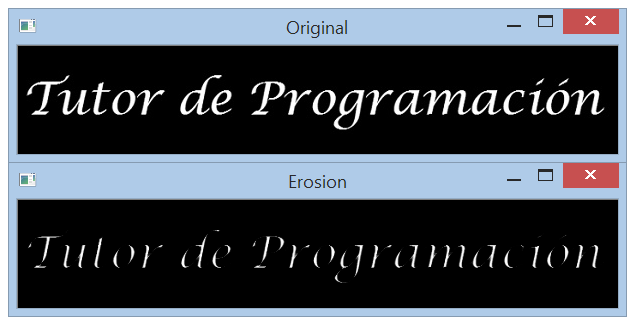

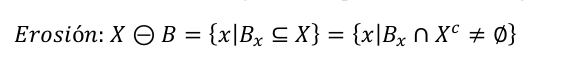

Imprimiendo resultado de segmentación


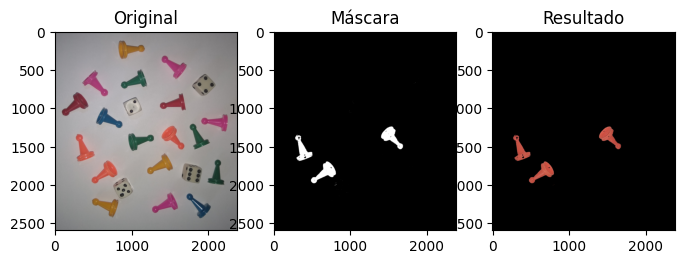

In [ ]:
#Buscando fichas naranjas
Bin_Fichas_Naranjas = (Hue < 10)*(Hue > 1)*(Saturation > 130)
#Organizando resultado
[Fl, Cl, Ch]=Imagen.shape
Resultado_Fichas_N = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_N[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Naranjas
Resultado_Fichas_N[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Naranjas
Resultado_Fichas_N[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Naranjas
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Naranjas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_N[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

Suponiendo que las regiones quedaron muy amplias, se deben reducir de tamaño.

Imprimiendo resultado de dilatación


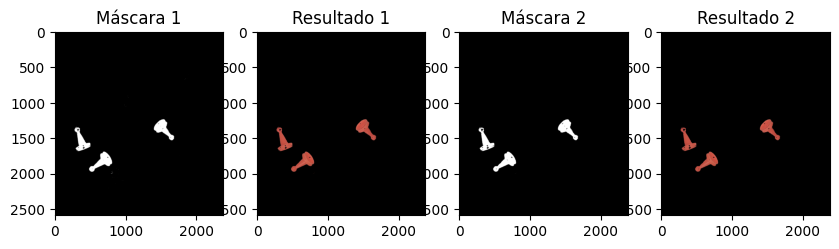

In [ ]:
#Se crea kernel de procesamiento
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
eroded = cv2.erode(Bin_Fichas_Naranjas.astype('uint8'),kernel)
#Armando resultado
Resultado_Fichas_N2 = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_N2[:,:,0]=Imagen[:,:,0]*eroded
Resultado_Fichas_N2[:,:,1]=Imagen[:,:,1]*eroded
Resultado_Fichas_N2[:,:,2]=Imagen[:,:,2]*eroded
print('Imprimiendo resultado de dilatación')
fig2, (axs1,axs2,axs3,axs4) =plt.subplots(1, 4,figsize=(10,10))
axs1.imshow(Bin_Fichas_Naranjas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs1.set_title('Máscara 1')
axs2.imshow(Resultado_Fichas_N[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs2.set_title('Resultado 1')
axs3.imshow(eroded.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs3.set_title('Máscara 2')
axs4.imshow(Resultado_Fichas_N2[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs4.set_title('Resultado 2')
plt.show()
print('')

Combinando dilataciòn y erosiòn

Imprimiendo resultado de segmentación


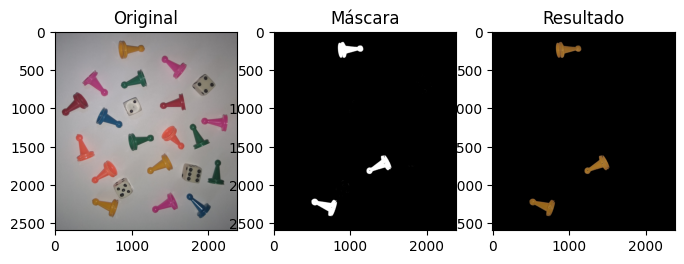

In [ ]:
# Trabajando con fichas amarillas
Bin_Fichas_Amarillas =np.zeros((Fl,Cl))
Bin_Fichas_Amarillas = (Hue < 20)*(Hue > 10)*(Saturation > 130)
#Organizando resultado
[Fl, Cl, Ch]=Imagen.shape
Resultado_Fichas_Am = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_Am[:,:,0]=Imagen[:,:,0]*Bin_Fichas_Amarillas
Resultado_Fichas_Am[:,:,1]=Imagen[:,:,1]*Bin_Fichas_Amarillas
Resultado_Fichas_Am[:,:,2]=Imagen[:,:,2]*Bin_Fichas_Amarillas
print('Imprimiendo resultado de segmentación')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Bin_Fichas_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas_Am[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

Mejorando resultado con dilatación

Imprimiendo resultado de dilatación


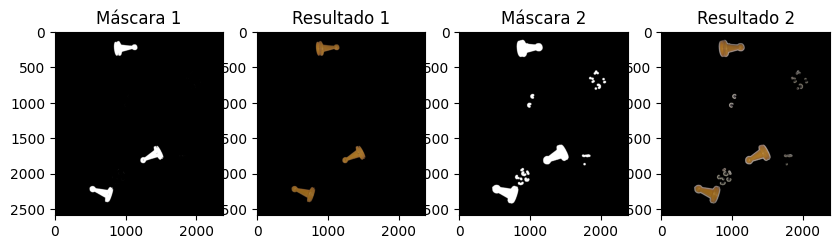

In [ ]:
#Se crea kernel de procesamiento
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(35,35))
dilated2 = cv2.dilate(Bin_Fichas_Amarillas.astype('uint8'),kernel)
#Armando resultado
Resultado_Fichas_Am2 = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_Am2[:,:,0]=Imagen[:,:,0]*dilated2
Resultado_Fichas_Am2[:,:,1]=Imagen[:,:,1]*dilated2
Resultado_Fichas_Am2[:,:,2]=Imagen[:,:,2]*dilated2
print('Imprimiendo resultado de dilatación')
fig2, (axs1,axs2,axs3,axs4) =plt.subplots(1, 4,figsize=(10,10))
axs1.imshow(Bin_Fichas_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs1.set_title('Máscara 1')
axs2.imshow(Resultado_Fichas_Am[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs2.set_title('Resultado 1')
axs3.imshow(dilated2.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs3.set_title('Máscara 2')
axs4.imshow(Resultado_Fichas_Am2[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs4.set_title('Resultado 2')
plt.show()
print('')

Como apareció ruido de la mejora, hay que corregir.

Imprimiendo resultado de dilatación


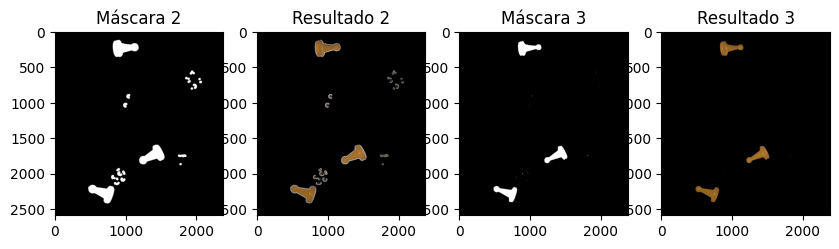

In [ ]:
#Se crea kernel de procesamiento
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(35,35))
eroded2 = cv2.erode(dilated2.astype('uint8'),kernel)
#Armando resultado
Resultado_Fichas_Am3 = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_Am3[:,:,0]=Imagen[:,:,0]*eroded2
Resultado_Fichas_Am3[:,:,1]=Imagen[:,:,1]*eroded2
Resultado_Fichas_Am3[:,:,2]=Imagen[:,:,2]*eroded2
print('Imprimiendo resultado de dilatación')
fig2, (axs1,axs2,axs3,axs4) =plt.subplots(1, 4,figsize=(10,10))
axs1.imshow(dilated2.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs1.set_title('Máscara 2')
axs2.imshow(Resultado_Fichas_Am2[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs2.set_title('Resultado 2')
axs3.imshow(eroded2.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs3.set_title('Máscara 3')
axs4.imshow(Resultado_Fichas_Am3[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs4.set_title('Resultado 3')
plt.show()
print('')

Funciones de apertura y de cierre.
https://programmerclick.com/article/43161870097/

Imprimiendo resultado de apertura


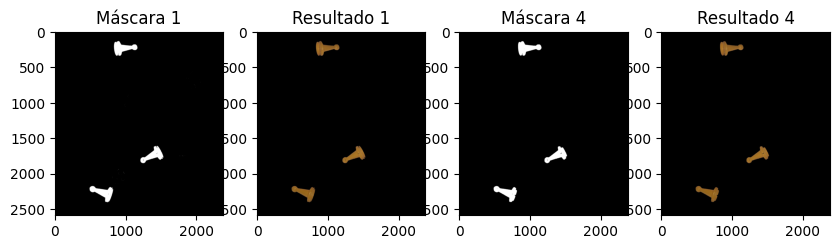


Imprimiendo resultado de cierre


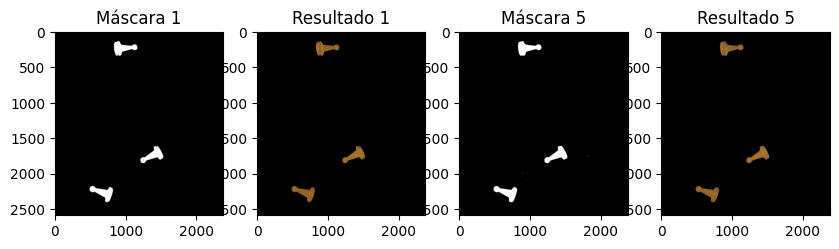

In [ ]:
Opened_Amarillas =np.zeros((Fl,Cl))
Closed_Amarillas =np.zeros((Fl,Cl))

kernel_O = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
kernel_C = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
Closed_Amarillas = cv2.morphologyEx(Bin_Fichas_Amarillas.astype('uint8'), cv2.MORPH_CLOSE, kernel_C)
Opened_Amarillas= cv2.morphologyEx(Bin_Fichas_Amarillas.astype('uint8'), cv2.MORPH_OPEN, kernel_O)

#Armando resultado Apertura
Resultado_Fichas_Am4 = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_Am4[:,:,0]=Imagen[:,:,0]*Opened_Amarillas
Resultado_Fichas_Am4[:,:,1]=Imagen[:,:,1]*Opened_Amarillas
Resultado_Fichas_Am4[:,:,2]=Imagen[:,:,2]*Opened_Amarillas
print('Imprimiendo resultado de apertura')
fig2, (axs1,axs2,axs3,axs4) =plt.subplots(1, 4,figsize=(10,10))
axs1.imshow(Bin_Fichas_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs1.set_title('Máscara 1')
axs2.imshow(Resultado_Fichas_Am[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs2.set_title('Resultado 1')
axs3.imshow(Opened_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs3.set_title('Máscara 4')
axs4.imshow(Resultado_Fichas_Am4[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs4.set_title('Resultado 4')
plt.show()
print('')

#Armando resultado Cierre
Resultado_Fichas_Am5 = np.zeros((Fl,Cl,Ch))
Resultado_Fichas_Am5[:,:,0]=Imagen[:,:,0]*Closed_Amarillas
Resultado_Fichas_Am5[:,:,1]=Imagen[:,:,1]*Closed_Amarillas
Resultado_Fichas_Am5[:,:,2]=Imagen[:,:,2]*Closed_Amarillas
print('Imprimiendo resultado de cierre')
fig2, (axs1,axs2,axs3,axs4) =plt.subplots(1, 4,figsize=(10,10))
axs1.imshow(Bin_Fichas_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs1.set_title('Máscara 1')
axs2.imshow(Resultado_Fichas_Am[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs2.set_title('Resultado 1')
axs3.imshow(Closed_Amarillas.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs3.set_title('Máscara 5')
axs4.imshow(Resultado_Fichas_Am5[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs4.set_title('Resultado 5')
plt.show()
print('')

#3. Conteo de objetos

La estrategia consiste en encontrar los contornos de los onbetos, y luego contar el número de ellos.

In [ ]:
(Bordes_Am,_) =cv2.findContours(Opened_Amarillas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(Bordes_Am)==4:
  print('Usted tiene '+ str(len(Bordes_Am))+' fichas de color amarillo, están completas.')
else:
    if len(Bordes_Am)<4:
      print('Usted tiene ' + str(len(Bordes_Am)) + ' fichas de color amarillo, hacen falta ' + str(4-len(Bordes_Am))+' fichas para el paquete.')
    else:
      if len(Bordes_Am)>4:
         print('Usted tiene ' + str(len(Bordes_Am)) + ' fichas de color amarillo, sobran ' + str(len(Bordes_Am)-4)+' fichas.')

Usted tiene 3 fichas de color amarillo, hacen falta 1 fichas para el paquete.


#Actividad

1. Termine el ejercicio de la segmentación de las fichas, para todos los colores. mejore las regiones encontradas utilizando las operaciones morfológicas.

# Información adicional: Binarizando con función de open cv

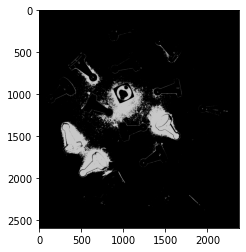

In [ ]:
ret,Bin_1 = cv2.threshold(Rojo,185,200,cv2.THRESH_BINARY)
plt.imshow(Bin_1.astype('uint8'),vmin=0, vmax=255,cmap='gray') 
plt.show()
print('')

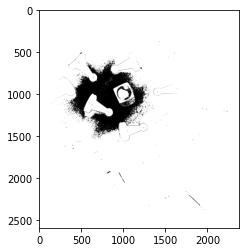

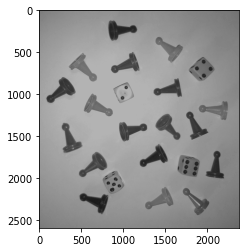

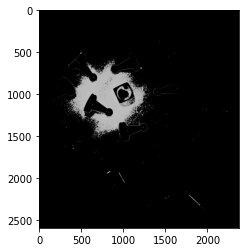

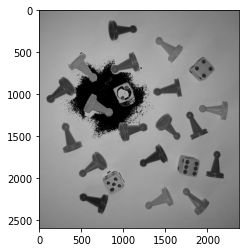

In [ ]:
ret,thresh2 = cv2.threshold(Imagen[:,:,0],180,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2.astype('uint8'),vmin=0, vmax=255,cmap='gray') 
plt.show()
print('')


ret,thresh3 = cv2.threshold(Imagen[:,:,0],180,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3.astype('uint8'),vmin=0, vmax=255,cmap='gray') 
plt.show()
print('')

ret,thresh4 = cv2.threshold(Imagen[:,:,0],180,255,cv2.THRESH_TOZERO)
plt.imshow(thresh4.astype('uint8'),vmin=0, vmax=255,cmap='gray') 
plt.show()
print('')

ret,thresh5 = cv2.threshold(Imagen[:,:,0],180,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5.astype('uint8'),vmin=0, vmax=255,cmap='gray') 
plt.show()
print('')